In [2]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import BatchNormalization

In [3]:
m_df = pd.read_csv('data/processed_files/DataFrames/m_df.csv')
m_M_df = pd.read_csv('data/processed_files/DataFrames/m_M_df.csv')

In [4]:
print(m_df.shape, m_M_df.shape)

(12634, 2) (110, 2)


In [12]:
print('M index range:', m_M_df[m_M_df.label=='M'].index[0], m_M_df[m_M_df.label=='M'].index[-1])
print('m index range:',m_M_df[m_M_df.label=='m'].index[0], m_M_df[m_M_df.label=='m'].index[-1])

M index range: 0 54
m index range: 55 109


Text(0.5, 1.0, 'Label: M')

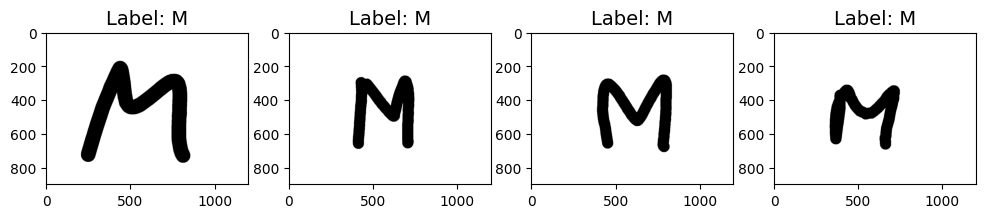

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 5))
ax[0].imshow(cv2.imread(m_M_df['path'].iloc[0]))
ax[0].set_title(f'Label: {m_M_df.label.iloc[0]}', fontsize=14)
ax[1].imshow(cv2.imread(m_M_df['path'].iloc[15]))
ax[1].set_title(f'Label: {m_M_df.label.iloc[15]}', fontsize=14)
ax[2].imshow(cv2.imread(m_M_df['path'].iloc[23]))
ax[2].set_title(f'Label: {m_M_df.label.iloc[23]}', fontsize=14)
ax[3].imshow(cv2.imread(m_M_df['path'].iloc[45]))
ax[3].set_title(f'Label: {m_M_df.label.iloc[45]}', fontsize=14)

Text(0.5, 1.0, 'Label: m')

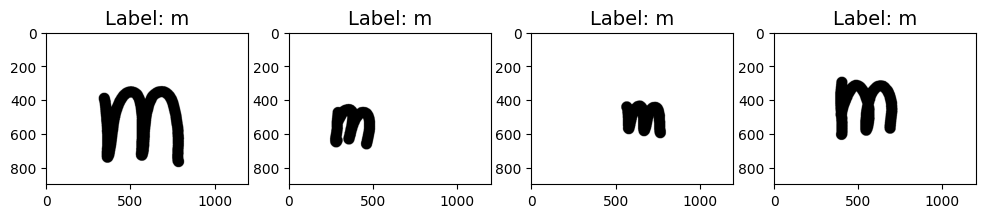

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 5))
ax[0].imshow(cv2.imread(m_M_df['path'].iloc[57]))
ax[0].set_title(f'Label: {m_M_df.label.iloc[57]}', fontsize=14)
ax[1].imshow(cv2.imread(m_M_df['path'].iloc[65]))
ax[1].set_title(f'Label: {m_M_df.label.iloc[65]}', fontsize=14)
ax[2].imshow(cv2.imread(m_M_df['path'].iloc[85]))
ax[2].set_title(f'Label: {m_M_df.label.iloc[85]}', fontsize=14)
ax[3].imshow(cv2.imread(m_M_df['path'].iloc[108]))
ax[3].set_title(f'Label: {m_M_df.label.iloc[108]}', fontsize=14)

Text(0.5, 1.0, 'Label: m')

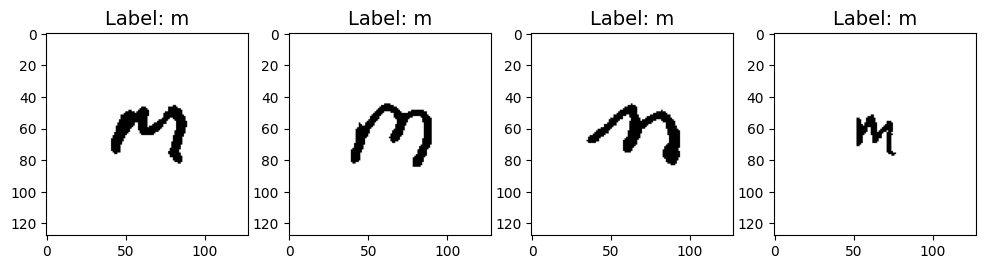

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 5))
ax[0].imshow(cv2.imread(m_df['path'].iloc[650]))
ax[0].set_title(f'Label: {m_df.label.iloc[650]}', fontsize=14)
ax[1].imshow(cv2.imread(m_df['path'].iloc[950]))
ax[1].set_title(f'Label: {m_df.label.iloc[950]}', fontsize=14)
ax[2].imshow(cv2.imread(m_df['path'].iloc[6500]))
ax[2].set_title(f'Label: {m_df.label.iloc[6500]}', fontsize=14)
ax[3].imshow(cv2.imread(m_df['path'].iloc[2500]))
ax[3].set_title(f'Label: {m_df.label.iloc[2500]}', fontsize=14)

Text(0.5, 1.0, 'Label: m')

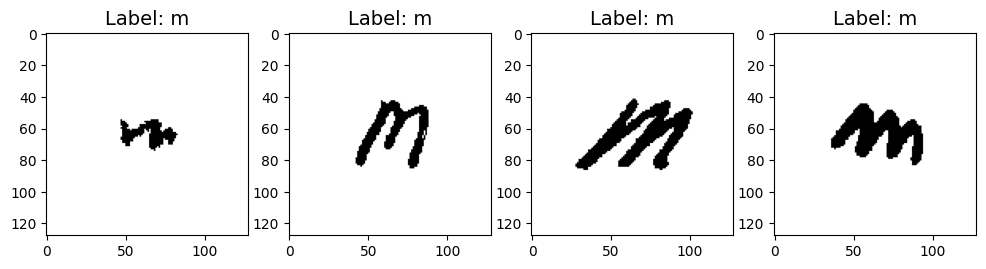

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 5))
ax[0].imshow(cv2.imread(m_df['path'].iloc[12052]))
ax[0].set_title(f'Label: {m_df.label.iloc[12052]}', fontsize=14)
ax[1].imshow(cv2.imread(m_df['path'].iloc[952]))
ax[1].set_title(f'Label: {m_df.label.iloc[952]}', fontsize=14)
ax[2].imshow(cv2.imread(m_df['path'].iloc[6700]))
ax[2].set_title(f'Label: {m_df.label.iloc[6700]}', fontsize=14)
ax[3].imshow(cv2.imread(m_df['path'].iloc[502]))
ax[3].set_title(f'Label: {m_df.label.iloc[502]}', fontsize=14)

In [4]:
def prepare_image(path):
    layer = cv2.split(cv2.imread(path))[0]
    new_rows = []
    for row in layer:
        if row.mean() != 255:
            new_rows.append(row)
    new_rows = np.array(new_rows)
    new_columns = []
    for column in new_rows.T:
        if column.mean() != 255:
            new_columns.append(column)
    new_array = np.array(new_columns).T
    # the image should be a square - add whitespace to make it into a square
    width = new_array.shape[1]
    height = new_array.shape[0]
    if width > height+3:
        # add 3 in order to account for images which are already close enough to being squares
        amount_rows_to_add = (width-height)//2
        row_to_add = [255.0 for n in range(width)]
        rows_to_add = np.array([row_to_add for n in range(amount_rows_to_add)])
        new_array = np.vstack([rows_to_add, new_array, rows_to_add])
    if height > width+3:
        transpose = new_array.T
        amount_rows_to_add = (height-width)//2
        row_to_add = [255.0 for n in range(height)]
        rows_to_add = np.array([row_to_add for n in range(amount_rows_to_add)])
        new_array = np.vstack([rows_to_add, transpose, rows_to_add]).T
    return cv2.resize(new_array, (40, 40))

In [5]:
images_for_dataframe = []
for p in m_M_df.path:
    try:
        images_for_dataframe.append(prepare_image(p)) 
    except Exception as e:
        print(e)
        images_for_dataframe.append('error')

In [6]:
m_M_df['images'] = images_for_dataframe

In [7]:
images_for_dataframe = []
for p in m_df.path:
    try:
        images_for_dataframe.append(prepare_image(p)) 
    except Exception as e:
        print(e)
        images_for_dataframe.append('error')

In [8]:
m_df['images'] = images_for_dataframe

In [9]:
y, label_index = pd.factorize(['m', 'M'])
x_train = [val for val in m_M_df.images.values]
x_test = [val for val in m_df.images.values]
y_train = [0 if val == 'm' else 1 for val in m_M_df.label.values]
x_train = np.array(x_train)
x_test = np.array(x_test)
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2],1)
#num_labels = 2
y_training = to_categorical(y_train, dtype='int')
#y_training = []
x_train_norm = x_train/255
x_test_norm = x_test/255
x_train_norm_train, x_validate, y_training_train, y_validate = train_test_split(x_train_norm, 
                    y_training, test_size = 0.20, stratify=y_training, random_state=22)

In [10]:
x_train.shape, x_test.shape

((110, 40, 40, 1), (12634, 40, 40, 1))

In [52]:
def define_model1(input_img_size=40, output_size=2):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(input_img_size, input_img_size, 1)))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPool2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dense(output_size, activation='softmax'))
    return model


model1 = define_model1()
opt = SGD(learning_rate=0.01, momentum=0.9)
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = model1.fit(x_train_norm_train, y_training_train, epochs=200,  validation_data = (x_validate,y_validate))

Epoch 1/200
3/3 [==============================] - 1s 149ms/step - loss: 0.6072 - accuracy: 0.7500 - val_loss: 2.4416 - val_accuracy: 0.5000
Epoch 2/200
3/3 [==============================] - 0s 76ms/step - loss: 0.1136 - accuracy: 0.9773 - val_loss: 3.6315 - val_accuracy: 0.5000
Epoch 3/200
3/3 [==============================] - 0s 68ms/step - loss: 0.0328 - accuracy: 0.9886 - val_loss: 4.2150 - val_accuracy: 0.5000
Epoch 4/200
3/3 [==============================] - 0s 68ms/step - loss: 0.0118 - accuracy: 1.0000 - val_loss: 4.1295 - val_accuracy: 0.5000
Epoch 5/200
3/3 [==============================] - 0s 65ms/step - loss: 0.0121 - accuracy: 1.0000 - val_loss: 3.7537 - val_accuracy: 0.5000
Epoch 6/200
3/3 [==============================] - 0s 69ms/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 3.1871 - val_accuracy: 0.5000
Epoch 7/200
3/3 [==============================] - 0s 64ms/step - loss: 0.0120 - accuracy: 1.0000 - val_loss: 2.5106 - val_accuracy: 0.5000
Epoch 8/200
3/3 [==

In [56]:
def define_model2(input_img_size=40, output_size=2):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(input_img_size, input_img_size, 1)))
    model.add(BatchNormalization())
    initializer = tensorflow.keras.initializers.GlorotUniform()
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=initializer))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPool2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dense(output_size, activation='softmax'))
    return model


model2 = define_model2()
opt = SGD(learning_rate=0.01, momentum=0.9)
model2.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model2.fit(x_train_norm_train, y_training_train, epochs=200,  validation_data = (x_validate,y_validate))

Epoch 1/200
3/3 [==============================] - 1s 313ms/step - loss: 0.5618 - accuracy: 0.7841 - val_loss: 1.7372 - val_accuracy: 0.5000
Epoch 2/200
3/3 [==============================] - 1s 207ms/step - loss: 0.0301 - accuracy: 0.9886 - val_loss: 4.3892 - val_accuracy: 0.5000
Epoch 3/200
3/3 [==============================] - 1s 199ms/step - loss: 0.0131 - accuracy: 1.0000 - val_loss: 4.7805 - val_accuracy: 0.5000
Epoch 4/200
3/3 [==============================] - 1s 198ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 4.1602 - val_accuracy: 0.5000
Epoch 5/200
3/3 [==============================] - 1s 193ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 3.4241 - val_accuracy: 0.5000
Epoch 6/200
3/3 [==============================] - 1s 189ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 2.7986 - val_accuracy: 0.5000
Epoch 7/200
3/3 [==============================] - 1s 197ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 2.3609 - val_accuracy: 0.5455
Epoch 8/200
3

In [12]:
def define_model2(input_img_size=40, output_size=2):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(input_img_size, input_img_size, 1)))
    model.add(BatchNormalization())
    initializer = tensorflow.keras.initializers.GlorotUniform()
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=initializer))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPool2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dense(output_size, activation='softmax'))
    return model


model2 = define_model2()
opt = SGD(learning_rate=0.01, momentum=0.9)
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = model2.fit(x_train_norm_train, y_training_train, epochs=35,  validation_data = (x_validate,y_validate))

Epoch 1/35
3/3 [==============================] - 1s 288ms/step - loss: 0.4093 - accuracy: 0.8182 - val_loss: 1.5070 - val_accuracy: 0.5000
Epoch 2/35
3/3 [==============================] - 1s 196ms/step - loss: 0.0314 - accuracy: 0.9886 - val_loss: 2.3662 - val_accuracy: 0.5000
Epoch 3/35
3/3 [==============================] - 1s 187ms/step - loss: 0.0126 - accuracy: 1.0000 - val_loss: 2.6012 - val_accuracy: 0.5000
Epoch 4/35
3/3 [==============================] - 1s 192ms/step - loss: 0.0125 - accuracy: 1.0000 - val_loss: 2.4550 - val_accuracy: 0.5000
Epoch 5/35
3/3 [==============================] - 1s 191ms/step - loss: 0.0206 - accuracy: 1.0000 - val_loss: 2.0359 - val_accuracy: 0.5000
Epoch 6/35
3/3 [==============================] - 1s 182ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 1.5034 - val_accuracy: 0.4545
Epoch 7/35
3/3 [==============================] - 1s 183ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 1.1506 - val_accuracy: 0.5000
Epoch 8/35
3/3 [====

In [14]:
predictions = model2.predict(x_test_norm)

395/395 [==============================] - 18s 44ms/step


In [84]:
y, label_index

(array([0, 1], dtype=int64), array(['m', 'M'], dtype=object))

In [85]:
pred_y_test_labels = [label_index[predictions[i].argmax()] for i in range(len(predictions))]
m_df['predicted_label'] = pred_y_test_labels

In [87]:
m_df.predicted_label.value_counts()

m    11511
M     1123
Name: predicted_label, dtype: int64

In [88]:
uppercase = m_df[m_df.predicted_label=='M']

Text(0.5, 1.0, 'Label: M')

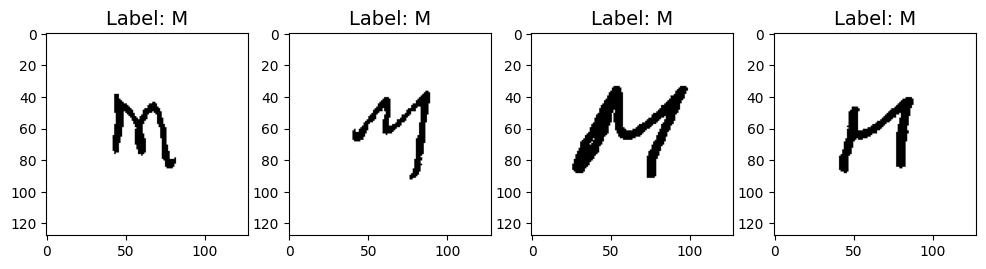

In [89]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 5))
ax[0].imshow(cv2.imread(uppercase['path'].iloc[650]))
ax[0].set_title(f'Label: {uppercase.predicted_label.iloc[650]}', fontsize=14)
ax[1].imshow(cv2.imread(uppercase['path'].iloc[50]))
ax[1].set_title(f'Label: {uppercase.predicted_label.iloc[50]}', fontsize=14)
ax[2].imshow(cv2.imread(uppercase['path'].iloc[150]))
ax[2].set_title(f'Label: {uppercase.predicted_label.iloc[150]}', fontsize=14)
ax[3].imshow(cv2.imread(uppercase['path'].iloc[1000]))
ax[3].set_title(f'Label: {uppercase.predicted_label.iloc[1000]}', fontsize=14)

Text(0.5, 1.0, 'Label: M')

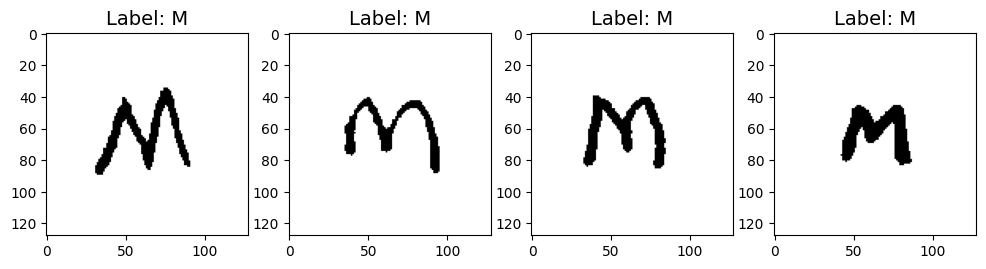

In [90]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 5))
ax[0].imshow(cv2.imread(uppercase['path'].iloc[651]))
ax[0].set_title(f'Label: {uppercase.predicted_label.iloc[651]}', fontsize=14)
ax[1].imshow(cv2.imread(uppercase['path'].iloc[51]))
ax[1].set_title(f'Label: {uppercase.predicted_label.iloc[51]}', fontsize=14)
ax[2].imshow(cv2.imread(uppercase['path'].iloc[151]))
ax[2].set_title(f'Label: {uppercase.predicted_label.iloc[151]}', fontsize=14)
ax[3].imshow(cv2.imread(uppercase['path'].iloc[1001]))
ax[3].set_title(f'Label: {uppercase.predicted_label.iloc[1001]}', fontsize=14)

In [91]:
import random

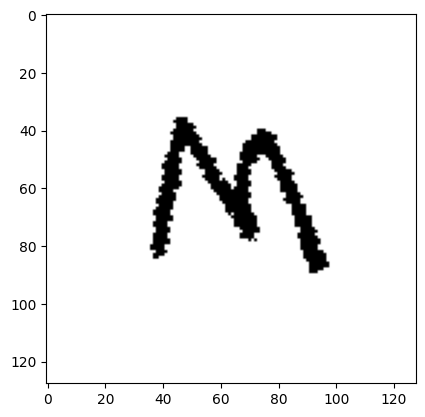

In [94]:
# try with different random indexes
plt.imshow(cv2.imread(uppercase['path'].iloc[random.randint(0, len(uppercase))]))

In [95]:
# I can see that my model has correctly identified the uppercase Ms. Now, lets check lowercase. 

In [97]:
print(tensorflow. __version__)

2.10.0


In [98]:
# first save the model 

model1.save('./models/mM.tf')

INFO:tensorflow:Assets written to: ./models/mM.tf\assets


INFO:tensorflow:Assets written to: ./models/mM.tf\assets


In [100]:
lowercase = m_df[m_df.predicted_label=='m']

Text(0.5, 1.0, 'Label: m')

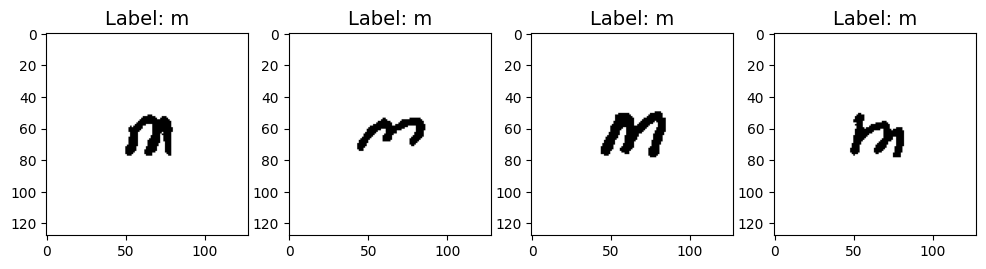

In [101]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 5))
ax[0].imshow(cv2.imread(lowercase['path'].iloc[650]))
ax[0].set_title(f'Label: {lowercase.predicted_label.iloc[650]}', fontsize=14)
ax[1].imshow(cv2.imread(lowercase['path'].iloc[50]))
ax[1].set_title(f'Label: {lowercase.predicted_label.iloc[50]}', fontsize=14)
ax[2].imshow(cv2.imread(lowercase['path'].iloc[150]))
ax[2].set_title(f'Label: {lowercase.predicted_label.iloc[150]}', fontsize=14)
ax[3].imshow(cv2.imread(lowercase['path'].iloc[1000]))
ax[3].set_title(f'Label: {lowercase.predicted_label.iloc[1000]}', fontsize=14)

Text(0.5, 1.0, 'Label: m')

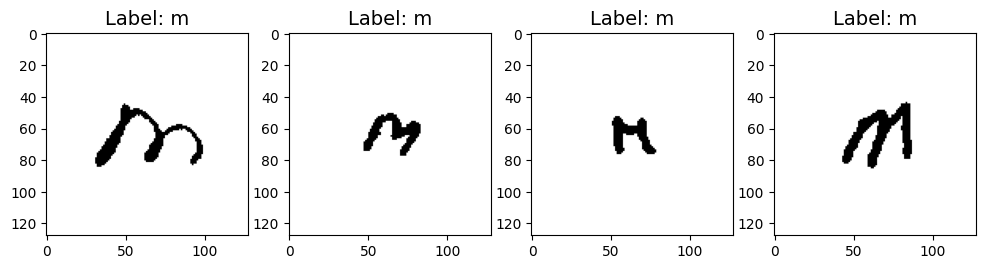

In [102]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 5))
ax[0].imshow(cv2.imread(lowercase['path'].iloc[6050]))
ax[0].set_title(f'Label: {lowercase.predicted_label.iloc[6050]}', fontsize=14)
ax[1].imshow(cv2.imread(lowercase['path'].iloc[5]))
ax[1].set_title(f'Label: {lowercase.predicted_label.iloc[5]}', fontsize=14)
ax[2].imshow(cv2.imread(lowercase['path'].iloc[1500]))
ax[2].set_title(f'Label: {lowercase.predicted_label.iloc[1500]}', fontsize=14)
ax[3].imshow(cv2.imread(lowercase['path'].iloc[1008]))
ax[3].set_title(f'Label: {lowercase.predicted_label.iloc[1008]}', fontsize=14)

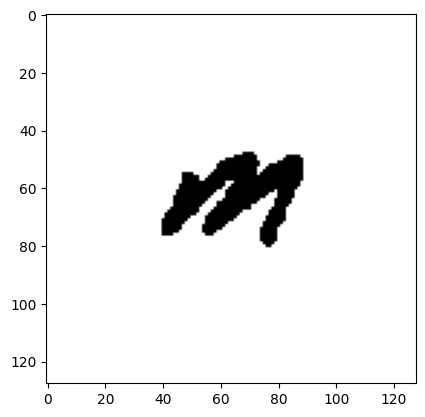

In [112]:
plt.imshow(cv2.imread(lowercase['path'].iloc[random.randint(0, len(lowercase))]))